In [1]:
# Importing essential libraries
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing machine learning tools from Scikit-learn
from sklearn.preprocessing import LabelEncoder ,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# Importing XGBoost library for regression
from xgboost import XGBRegressor


In [3]:
# Create file path
file_path = os.path.join(os.getcwd(),'South_Asian_dataset.csv')
# Load CSV file
data=pd.read_csv(file_path)
# Preview data
data.head(-1)

,Country,Year,GDP (current US$),GDP growth (annual %),GDP per capita (current US$),"Unemployment, total (% of total labor force) (modeled ILO estimate)","Inflation, consumer prices (annual %)","Foreign direct investment, net inflows (% of GDP)",Trade (% of GDP),Gini index,...,Renewable energy consumption (% of total final energy consumption),Forest area (% of land area),Control of Corruption: Percentile Rank,Political Stability and Absence of Violence/Terrorism: Estimate,Regulatory Quality: Estimate,Rule of Law: Estimate,Voice and Accountability: Estimate,Individuals using the Internet (% of population),Research and development expenditure (% of GDP),High-technology exports (% of manufactured exports)
0,Afghanistan,2000,3.521418e+09,NaN,180.188369,7.955,NaN,0.004828,NaN,NaN,...,45,1.852781994,4.787233829,-2.438968897,-2.080252647,-1.780660748,-2.031417131,..,..,..
1,Afghanistan,2001,2.813572e+09,-9.431974,142.903364,7.958,NaN,0.024169,NaN,NaN,...,45.6,1.852781994,..,..,..,..,..,0.00472257,..,..
2,Afghanistan,2002,3.825701e+09,28.600001,182.174038,7.939,NaN,1.306950,NaN,NaN,...,37.8,1.852781994,4.761904716,-2.035033703,-1.81154573,-1.673473239,-1.433421016,0.0045614,..,..
3,Afghanistan,2003,4.520947e+09,8.832278,199.643226,7.922,NaN,1.278493,NaN,NaN,...,36.7,1.852781994,4.761904716,-2.198372364,-1.463107824,-1.5582937,-1.177571177,0.0878913,..,..
4,Afghanistan,2004,5.224897e+09,1.414118,221.830531,7.914,NaN,3.577104,NaN,NaN,...,44.2,1.852781994,6.403940678,-2.295682192,-1.511548996,-1.693925261,-1.203033924,0.105809,..,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,Pakistan,2018,3.561280e+11,6.151703,1620.742591,4.083,5.078057,0.487746,27.626056,29.6,...,43.4,4.940561436,24.2857151,-2.253884554,-0.667998254,-0.68372798,-0.813987374,15.34,..,2.169752837
187,Pakistan,2019,3.209090e+11,2.497637,1437.165833,4.830,10.578362,0.696146,28.905576,NaN,...,45.9,4.886934413,20.95238113,-2.251637459,-0.687235057,-0.688234627,-0.862723053,17.0709,0.17475,2.302693297
188,Pakistan,2020,3.004260e+11,-1.274087,1322.314785,6.162,9.739993,0.684695,26.716280,NaN,...,42.7,4.833307389,21.90476227,-1.792646289,-0.764765918,-0.712482035,-0.877666116,18.9348,..,1.887812496
189,Pakistan,2021,3.485170e+11,6.513886,1506.108293,6.338,9.496211,0.616039,27.030422,NaN,...,41.6,4.779680365,23.33333397,-1.713656187,-0.761585534,-0.658457339,-0.841158211,24.9775,0.164430007,1.488483293


In [4]:
# Check for missing values in each column
data.isna().sum()

Country                                                                         0
Year                                                                            0
GDP (current US$)                                                               2
GDP growth (annual %)                                                           3
GDP per capita (current US$)                                                    2
Unemployment, total (% of total labor force) (modeled ILO estimate)             0
Inflation, consumer prices (annual %)                                           9
Foreign direct investment, net inflows (% of GDP)                               5
Trade (% of GDP)                                                               51
Gini index                                                                    150
Population, total                                                               0
Population growth (annual %)                                                    0
Poverty headcoun

In [5]:
# Get  information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 33 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   Country                                                                     192 non-null    object 
 1   Year                                                                        192 non-null    int64  
 2   GDP (current US$)                                                           190 non-null    float64
 3   GDP growth (annual %)                                                       189 non-null    float64
 4   GDP per capita (current US$)                                                190 non-null    float64
 5   Unemployment, total (% of total labor force) (modeled ILO estimate)         192 non-null    float64
 6   Inflation, consumer prices (annual %)             

In [6]:
# Get the data types of each column in the dataframe
column_types = data.dtypes
print(column_types)

# Count the occurrences of each data type
type_counts = column_types.value_counts()
print("\nNumber of each data type:")
print(type_counts)

Country                                                                        object
Year                                                                            int64
GDP (current US$)                                                             float64
GDP growth (annual %)                                                         float64
GDP per capita (current US$)                                                  float64
Unemployment, total (% of total labor force) (modeled ILO estimate)           float64
Inflation, consumer prices (annual %)                                         float64
Foreign direct investment, net inflows (% of GDP)                             float64
Trade (% of GDP)                                                              float64
Gini index                                                                    float64
Population, total                                                               int64
Population growth (annual %)                          

In [9]:
# Get the data types of each column in the dataframe
column_types = data.dtypes

# Extract column names based on their data types
numeric_columns = column_types[column_types == 'float64'].index.tolist()  # Columns with float64 type
integer_columns = column_types[column_types == 'int64'].index.tolist()    # Columns with int64 type
object_columns = column_types[column_types == 'object'].index.tolist()    # Columns with object type (categorical/string)

# Print the results
print("Numeric columns (float64):", numeric_columns)
print('-' * 100)  # Separator line
print("Integer columns (int64):", integer_columns)
print('-' * 100)  # Separator line
print("Object columns (Categorical/String):", object_columns)

Numeric columns (float64): ['GDP (current US$)', 'GDP growth (annual %)', 'GDP per capita (current US$)', 'Unemployment, total (% of total labor force) (modeled ILO estimate)', 'Inflation, consumer prices (annual %)', 'Foreign direct investment, net inflows (% of GDP)', 'Trade (% of GDP)', 'Gini index', 'Population growth (annual %)', 'Urban population (% of total population)']
----------------------------------------------------------------------------------------------------
Integer columns (int64): ['Year', 'Population, total']
----------------------------------------------------------------------------------------------------
Object columns (Categorical/String): ['Country', 'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)', 'Life expectancy at birth, total (years)', 'Mortality rate, infant (per 1,000 live births)', 'Literacy rate, adult total (% of people ages 15 and above)', 'School enrollment, primary (% gross)', 'Access to electricity (% of population)', 'Peo

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,192.0,2.011500e+03,6.940284e+00,2.000000e+03,2.005750e+03,2.011500e+03,2.017250e+03,2.023000e+03
GDP (current US$),190.0,2.910099e+11,6.701374e+11,4.607334e+08,5.291861e+09,3.066091e+10,1.931948e+11,3.549920e+12
GDP growth (annual %),189.0,5.065082e+00,6.265406e+00,-3.290883e+01,3.525153e+00,5.456388e+00,7.123428e+00,3.768719e+01
GDP per capita (current US$),190.0,2.161422e+03,2.465328e+03,1.429034e+02,6.322945e+02,1.250093e+03,2.689319e+03,1.266744e+04
"Unemployment, total (% of total labor force) (modeled ILO estimate)",192.0,6.287391e+00,3.204121e+00,3.980000e-01,4.045750e+00,5.839000e+00,8.384250e+00,1.438600e+01
"Inflation, consumer prices (annual %)",183.0,6.623532e+00,5.606191e+00,-6.811161e+00,3.747312e+00,5.702070e+00,8.356711e+00,4.972110e+01
"Foreign direct investment, net inflows (% of GDP)",187.0,1.913846e+00,2.959802e+00,-6.388063e-01,4.347154e-01,8.795171e-01,1.695962e+00,1.678347e+01
Trade (% of GDP),141.0,4.952521e+01,2.164519e+01,2.145997e+01,3.251463e+01,4.464241e+01,5.571059e+01,1.081578e+02
Gini index,42.0,3.430476e+01,3.989801e+00,2.850000e+01,3.130000e+01,3.380000e+01,3.762500e+01,4.380000e+01
"Population, total",192.0,2.110938e+08,4.053449e+08,2.825070e+05,1.427913e+07,2.742371e+07,1.670127e+08,1.428628e+09


In [8]:
data.columns

Index(['Country', 'Year', 'GDP (current US$)', 'GDP growth (annual %)',
       'GDP per capita (current US$)',
       'Unemployment, total (% of total labor force) (modeled ILO estimate)',
       'Inflation, consumer prices (annual %)',
       'Foreign direct investment, net inflows (% of GDP)', 'Trade (% of GDP)',
       'Gini index', 'Population, total', 'Population growth (annual %)',
       'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)',
       'Life expectancy at birth, total (years)',
       'Mortality rate, infant (per 1,000 live births)',
       'Literacy rate, adult total (% of people ages 15 and above)',
       'School enrollment, primary (% gross)',
       'Urban population (% of total population)',
       'Access to electricity (% of population)',
       'People using at least basic drinking water services (% of population)',
       'People using at least basic sanitation services (% of population)',
       'Carbon dioxide (CO2) emissions excluding LU

In [11]:
# Check for duplicated rows in the dataframe 
data.duplicated().sum()

0

In [12]:
data.shape

(192, 33)

### feature engenering

### Handling data

In [13]:
data.head()

,Country,Year,GDP (current US$),GDP growth (annual %),GDP per capita (current US$),"Unemployment, total (% of total labor force) (modeled ILO estimate)","Inflation, consumer prices (annual %)","Foreign direct investment, net inflows (% of GDP)",Trade (% of GDP),Gini index,...,Renewable energy consumption (% of total final energy consumption),Forest area (% of land area),Control of Corruption: Percentile Rank,Political Stability and Absence of Violence/Terrorism: Estimate,Regulatory Quality: Estimate,Rule of Law: Estimate,Voice and Accountability: Estimate,Individuals using the Internet (% of population),Research and development expenditure (% of GDP),High-technology exports (% of manufactured exports)
0,Afghanistan,2000,3.521418e+09,NaN,180.188369,7.955,NaN,0.004828,NaN,NaN,...,45,1.852781994,4.787233829,-2.438968897,-2.080252647,-1.780660748,-2.031417131,..,..,..
1,Afghanistan,2001,2.813572e+09,-9.431974,142.903364,7.958,NaN,0.024169,NaN,NaN,...,45.6,1.852781994,..,..,..,..,..,0.00472257,..,..
2,Afghanistan,2002,3.825701e+09,28.600001,182.174038,7.939,NaN,1.306950,NaN,NaN,...,37.8,1.852781994,4.761904716,-2.035033703,-1.81154573,-1.673473239,-1.433421016,0.0045614,..,..
3,Afghanistan,2003,4.520947e+09,8.832278,199.643226,7.922,NaN,1.278493,NaN,NaN,...,36.7,1.852781994,4.761904716,-2.198372364,-1.463107824,-1.5582937,-1.177571177,0.0878913,..,..
4,Afghanistan,2004,5.224897e+09,1.414118,221.830531,7.914,NaN,3.577104,NaN,NaN,...,44.2,1.852781994,6.403940678,-2.295682192,-1.511548996,-1.693925261,-1.203033924,0.105809,..,..


In [12]:
data.isna().sum()

Country                                                                         0
Year                                                                            0
GDP (current US$)                                                               2
GDP growth (annual %)                                                           3
GDP per capita (current US$)                                                    2
Unemployment, total (% of total labor force) (modeled ILO estimate)             0
Inflation, consumer prices (annual %)                                           9
Foreign direct investment, net inflows (% of GDP)                               5
Trade (% of GDP)                                                               51
Gini index                                                                    150
Population, total                                                               0
Population growth (annual %)                                                    0
Poverty headcoun

In [14]:
# Replace occurrences of '..' with NaN (Not a Number) in the dataframe
data = data.where(data != '..', np.nan)

In [15]:
data.head(5)

,Country,Year,GDP (current US$),GDP growth (annual %),GDP per capita (current US$),"Unemployment, total (% of total labor force) (modeled ILO estimate)","Inflation, consumer prices (annual %)","Foreign direct investment, net inflows (% of GDP)",Trade (% of GDP),Gini index,...,Renewable energy consumption (% of total final energy consumption),Forest area (% of land area),Control of Corruption: Percentile Rank,Political Stability and Absence of Violence/Terrorism: Estimate,Regulatory Quality: Estimate,Rule of Law: Estimate,Voice and Accountability: Estimate,Individuals using the Internet (% of population),Research and development expenditure (% of GDP),High-technology exports (% of manufactured exports)
0,Afghanistan,2000,3.521418e+09,NaN,180.188369,7.955,NaN,0.004828,NaN,NaN,...,45,1.852781994,4.787233829,-2.438968897,-2.080252647,-1.780660748,-2.031417131,NaN,NaN,NaN
1,Afghanistan,2001,2.813572e+09,-9.431974,142.903364,7.958,NaN,0.024169,NaN,NaN,...,45.6,1.852781994,NaN,NaN,NaN,NaN,NaN,0.00472257,NaN,NaN
2,Afghanistan,2002,3.825701e+09,28.600001,182.174038,7.939,NaN,1.306950,NaN,NaN,...,37.8,1.852781994,4.761904716,-2.035033703,-1.81154573,-1.673473239,-1.433421016,0.0045614,NaN,NaN
3,Afghanistan,2003,4.520947e+09,8.832278,199.643226,7.922,NaN,1.278493,NaN,NaN,...,36.7,1.852781994,4.761904716,-2.198372364,-1.463107824,-1.5582937,-1.177571177,0.0878913,NaN,NaN
4,Afghanistan,2004,5.224897e+09,1.414118,221.830531,7.914,NaN,3.577104,NaN,NaN,...,44.2,1.852781994,6.403940678,-2.295682192,-1.511548996,-1.693925261,-1.203033924,0.105809,NaN,NaN


In [16]:
data.isna().sum()

Country                                                                         0
Year                                                                            0
GDP (current US$)                                                               2
GDP growth (annual %)                                                           3
GDP per capita (current US$)                                                    2
Unemployment, total (% of total labor force) (modeled ILO estimate)             0
Inflation, consumer prices (annual %)                                           9
Foreign direct investment, net inflows (% of GDP)                               5
Trade (% of GDP)                                                               51
Gini index                                                                    150
Population, total                                                               0
Population growth (annual %)                                                    0
Poverty headcoun

In [17]:
# Calculate the number of missing values in each column
missing_data = data.isnull().sum()

# Filter columns that have missing values (greater than 0)
missing_columns = missing_data[missing_data > 0]

# Print columns with missing values and their respective counts
print("The columns containing missing values ​​and the number of x values ​​in each column:")
print(missing_columns)

# Print the total number of columns with missing values
print("\nThe number of columns that contain missing values:", len(missing_columns))

The columns containing missing values ​​and the number of x values ​​in each column:
GDP (current US$)                                                               2
GDP growth (annual %)                                                           3
GDP per capita (current US$)                                                    2
Inflation, consumer prices (annual %)                                           9
Foreign direct investment, net inflows (% of GDP)                               5
Trade (% of GDP)                                                               51
Gini index                                                                    150
Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)           150
Life expectancy at birth, total (years)                                         8
Mortality rate, infant (per 1,000 live births)                                  8
Literacy rate, adult total (% of people ages 15 and above)                    131
School enroll

In [18]:
# ['GDP (current US$)', 
#     'GDP growth (annual %)', 
#     'GDP per capita (current US$)', 
#     'Inflation, consumer prices (annual %)', 
#     'Foreign direct investment, net inflows (% of GDP)', 
#     'Trade (% of GDP)', 
#     'Gini index', 
#     'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)', 
#     'Life expectancy at birth, total (years)', 
#     'Mortality rate, infant (per 1,000 live births)', 
#     'Literacy rate, adult total (% of people ages 15 and above)', 
#     'School enrollment, primary (% gross)', 
#     'Access to electricity (% of population)', 
#     'People using at least basic drinking water services (% of population)', 
#     'People using at least basic sanitation services (% of population)', 
#     'Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)', 
#     'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)', 
#     'Renewable energy consumption (% of total final energy consumption)', 
#     'Forest area (% of land area)', 
#     'Control of Corruption: Percentile Rank', 
#     'Political Stability and Absence of Violence/Terrorism: Estimate', 
#     'Regulatory Quality: Estimate', 
#     'Rule of Law: Estimate', 
#     'Voice and Accountability: Estimate', 
#     'Individuals using the Internet (% of population)', 
#     'Research and development expenditure (% of GDP)', 
#     'High-technology exports (% of manufactured exports)'
# ]


In [19]:
# data['Trade (% of GDP)'].mean()

In [18]:
# Fill missing values in specific columns with their respective column means
data['Trade (% of GDP)'].fillna(data['Trade (% of GDP)'].mean(), inplace=True)
data['GDP (current US$)'].fillna(data['GDP (current US$)'].mean(), inplace=True)
data['GDP growth (annual %)'].fillna(data['GDP growth (annual %)'].mean(), inplace=True)
data['GDP per capita (current US$)'].fillna(data['GDP per capita (current US$)'].mean(), inplace=True)
data['Inflation, consumer prices (annual %)'].fillna(data['Inflation, consumer prices (annual %)'].mean(), inplace=True)
data['Foreign direct investment, net inflows (% of GDP)'].fillna(data['Foreign direct investment, net inflows (% of GDP)'].mean(), inplace=True)
data['Gini index'].fillna(data['Gini index'].mean(), inplace=True)

In [20]:
# Convert the specified column to numeric, coercing non-numeric values to NaN
column_name = 'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)'
data[column_name] = pd.to_numeric(data[column_name], errors='coerce')

# Print the updated column to verify the conversion
print(data[column_name])

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
187   NaN
188   NaN
189   NaN
190   NaN
191   NaN
Name: Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population), Length: 192, dtype: float64


In [21]:
# List of columns with missing values 
columns_with_missing_values = [
    'GDP (current US$)',
    'GDP growth (annual %)',
    'GDP per capita (current US$)',
    'Inflation, consumer prices (annual %)',
    'Foreign direct investment, net inflows (% of GDP)',
    'Trade (% of GDP)',
    'Gini index',
    'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)',
    'Life expectancy at birth, total (years)',
    'Mortality rate, infant (per 1,000 live births)',
    'Literacy rate, adult total (% of people ages 15 and above)',
    'School enrollment, primary (% gross)',
    'Access to electricity (% of population)',
    'People using at least basic drinking water services (% of population)',
    'People using at least basic sanitation services (% of population)',
    'Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)',
    'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)',
    'Renewable energy consumption (% of total final energy consumption)',
    'Forest area (% of land area)',
    'Control of Corruption: Percentile Rank',
    'Political Stability and Absence of Violence/Terrorism: Estimate',
    'Regulatory Quality: Estimate',
    'Rule of Law: Estimate',
    'Voice and Accountability: Estimate',
    'Individuals using the Internet (% of population)',
    'Research and development expenditure (% of GDP)',
    'High-technology exports (% of manufactured exports)'
]

In [22]:
# Loop through each column in the list of columns with missing values
for column_name in columns_with_missing_values:
   
    # Convert the column to numeric, coercing non-numeric values to NaN
    data[column_name] = pd.to_numeric(data[column_name], errors='coerce')

    # Print the column after conversion to verify the changes
    print(f"Column '{column_name}' after conversion:")
    print(data[column_name])
    print("=" * 50)  # Separator for readability

Column 'GDP (current US$)' after conversion:
0      3.521418e+09
1      2.813572e+09
2      3.825701e+09
3      4.520947e+09
4      5.224897e+09
           ...     
187    3.209090e+11
188    3.004260e+11
189    3.485170e+11
190    3.747880e+11
191    3.383680e+11
Name: GDP (current US$), Length: 192, dtype: float64
Column 'GDP growth (annual %)' after conversion:
0       5.065082
1      -9.431974
2      28.600001
3       8.832278
4       1.414118
         ...    
187     2.497637
188    -1.274087
189     6.513886
190     4.767540
191    -0.004855
Name: GDP growth (annual %), Length: 192, dtype: float64
Column 'GDP per capita (current US$)' after conversion:
0       180.188369
1       142.903364
2       182.174038
3       199.643226
4       221.830531
          ...     
187    1437.165833
188    1322.314785
189    1506.108293
190    1589.263980
191    1407.021351
Name: GDP per capita (current US$), Length: 192, dtype: float64
Column 'Inflation, consumer prices (annual %)' after convers

In [23]:
# Fill missing values in numeric columns with their mean
data = data.apply(lambda col: col.fillna(col.mean()) if col.dtype.kind in 'biufc' else col)

In [24]:
data.head()

,Country,Year,GDP (current US$),GDP growth (annual %),GDP per capita (current US$),"Unemployment, total (% of total labor force) (modeled ILO estimate)","Inflation, consumer prices (annual %)","Foreign direct investment, net inflows (% of GDP)",Trade (% of GDP),Gini index,...,Renewable energy consumption (% of total final energy consumption),Forest area (% of land area),Control of Corruption: Percentile Rank,Political Stability and Absence of Violence/Terrorism: Estimate,Regulatory Quality: Estimate,Rule of Law: Estimate,Voice and Accountability: Estimate,Individuals using the Internet (% of population),Research and development expenditure (% of GDP),High-technology exports (% of manufactured exports)
0,Afghanistan,2000,3.521418e+09,5.065082,180.188369,7.955,6.623532,0.004828,49.525213,34.304762,...,45.0,1.852782,4.787234,-2.438969,-2.080253,-1.780661,-2.031417,17.503976,0.437679,2.508904
1,Afghanistan,2001,2.813572e+09,-9.431974,142.903364,7.958,6.623532,0.024169,49.525213,34.304762,...,45.6,1.852782,33.954310,-0.960264,-0.633873,-0.483059,-0.506034,0.004723,0.437679,2.508904
2,Afghanistan,2002,3.825701e+09,28.600001,182.174038,7.939,6.623532,1.306950,49.525213,34.304762,...,37.8,1.852782,4.761905,-2.035034,-1.811546,-1.673473,-1.433421,0.004561,0.437679,2.508904
3,Afghanistan,2003,4.520947e+09,8.832278,199.643226,7.922,6.623532,1.278493,49.525213,34.304762,...,36.7,1.852782,4.761905,-2.198372,-1.463108,-1.558294,-1.177571,0.087891,0.437679,2.508904
4,Afghanistan,2004,5.224897e+09,1.414118,221.830531,7.914,6.623532,3.577104,49.525213,34.304762,...,44.2,1.852782,6.403941,-2.295682,-1.511549,-1.693925,-1.203034,0.105809,0.437679,2.508904


In [25]:
# Count the number of missing values (NaN) in each column
data.isna().sum()

Country                                                                       0
Year                                                                          0
GDP (current US$)                                                             0
GDP growth (annual %)                                                         0
GDP per capita (current US$)                                                  0
Unemployment, total (% of total labor force) (modeled ILO estimate)           0
Inflation, consumer prices (annual %)                                         0
Foreign direct investment, net inflows (% of GDP)                             0
Trade (% of GDP)                                                              0
Gini index                                                                    0
Population, total                                                             0
Population growth (annual %)                                                  0
Poverty headcount ratio at $2.15 a day (

### label incoder in features

In [26]:
# Get the data types of each column in the dataframe
column_types = data.dtypes

# Extract column names based on their data types
numeric_columns = column_types[column_types == 'float64'].index.tolist()  # Columns with float64 type
integer_columns = column_types[column_types == 'int64'].index.tolist()    # Columns with int64 type
object_columns = column_types[column_types == 'object'].index.tolist()    # Columns with object type (categorical/string)

# Print the results
print("Numeric columns (float64):", numeric_columns)
print('-' * 100)  # Separator line
print("Integer columns (int64):", integer_columns)
print('-' * 100)  # Separator line
print("Object columns (Categorical/String):", object_columns)

Numeric columns (float64): ['GDP (current US$)', 'GDP growth (annual %)', 'GDP per capita (current US$)', 'Unemployment, total (% of total labor force) (modeled ILO estimate)', 'Inflation, consumer prices (annual %)', 'Foreign direct investment, net inflows (% of GDP)', 'Trade (% of GDP)', 'Gini index', 'Population growth (annual %)', 'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)', 'Life expectancy at birth, total (years)', 'Mortality rate, infant (per 1,000 live births)', 'Literacy rate, adult total (% of people ages 15 and above)', 'School enrollment, primary (% gross)', 'Urban population (% of total population)', 'Access to electricity (% of population)', 'People using at least basic drinking water services (% of population)', 'People using at least basic sanitation services (% of population)', 'Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)', 'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)', 'Renewable energ

In [27]:
# Initialize the LabelEncoder
lbl = LabelEncoder()

# Encode the 'Country' column into numeric values
data['Country'] = lbl.fit_transform(data['Country'])

In [28]:
# Count the number of unique values in each column
unique_values_per_column = data.nunique()

# Print the number of unique values for each column
print("Number of unique values in each column:")
print(unique_values_per_column)

Number of unique values in each column:
Country                                                                         8
Year                                                                           24
GDP (current US$)                                                             191
GDP growth (annual %)                                                         190
GDP per capita (current US$)                                                  191
Unemployment, total (% of total labor force) (modeled ILO estimate)           185
Inflation, consumer prices (annual %)                                         184
Foreign direct investment, net inflows (% of GDP)                             188
Trade (% of GDP)                                                              142
Gini index                                                                     36
Population, total                                                             192
Population growth (annual %)                              

### visualisation data

In [29]:
data.head()

,Country,Year,GDP (current US$),GDP growth (annual %),GDP per capita (current US$),"Unemployment, total (% of total labor force) (modeled ILO estimate)","Inflation, consumer prices (annual %)","Foreign direct investment, net inflows (% of GDP)",Trade (% of GDP),Gini index,...,Renewable energy consumption (% of total final energy consumption),Forest area (% of land area),Control of Corruption: Percentile Rank,Political Stability and Absence of Violence/Terrorism: Estimate,Regulatory Quality: Estimate,Rule of Law: Estimate,Voice and Accountability: Estimate,Individuals using the Internet (% of population),Research and development expenditure (% of GDP),High-technology exports (% of manufactured exports)
0,0,2000,3.521418e+09,5.065082,180.188369,7.955,6.623532,0.004828,49.525213,34.304762,...,45.0,1.852782,4.787234,-2.438969,-2.080253,-1.780661,-2.031417,17.503976,0.437679,2.508904
1,0,2001,2.813572e+09,-9.431974,142.903364,7.958,6.623532,0.024169,49.525213,34.304762,...,45.6,1.852782,33.954310,-0.960264,-0.633873,-0.483059,-0.506034,0.004723,0.437679,2.508904
2,0,2002,3.825701e+09,28.600001,182.174038,7.939,6.623532,1.306950,49.525213,34.304762,...,37.8,1.852782,4.761905,-2.035034,-1.811546,-1.673473,-1.433421,0.004561,0.437679,2.508904
3,0,2003,4.520947e+09,8.832278,199.643226,7.922,6.623532,1.278493,49.525213,34.304762,...,36.7,1.852782,4.761905,-2.198372,-1.463108,-1.558294,-1.177571,0.087891,0.437679,2.508904
4,0,2004,5.224897e+09,1.414118,221.830531,7.914,6.623532,3.577104,49.525213,34.304762,...,44.2,1.852782,6.403941,-2.295682,-1.511549,-1.693925,-1.203034,0.105809,0.437679,2.508904


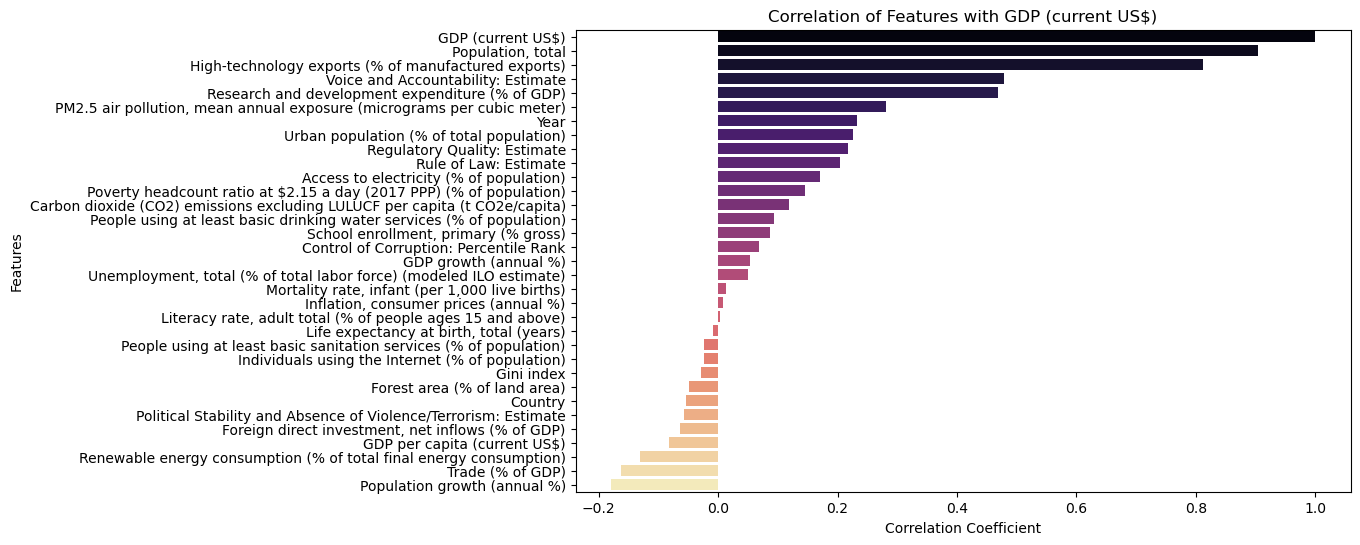

In [30]:
# Calculate the correlation of all features 
corr_with_price = data.corr()['GDP (current US$)'].sort_values(ascending=False)

# Create a bar plot to visualize the correlation
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_with_price.values, y=corr_with_price.index, palette='magma')

# Add titles and labels
plt.title('Correlation of Features with GDP (current US$)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')

# Display the plot
plt.show()

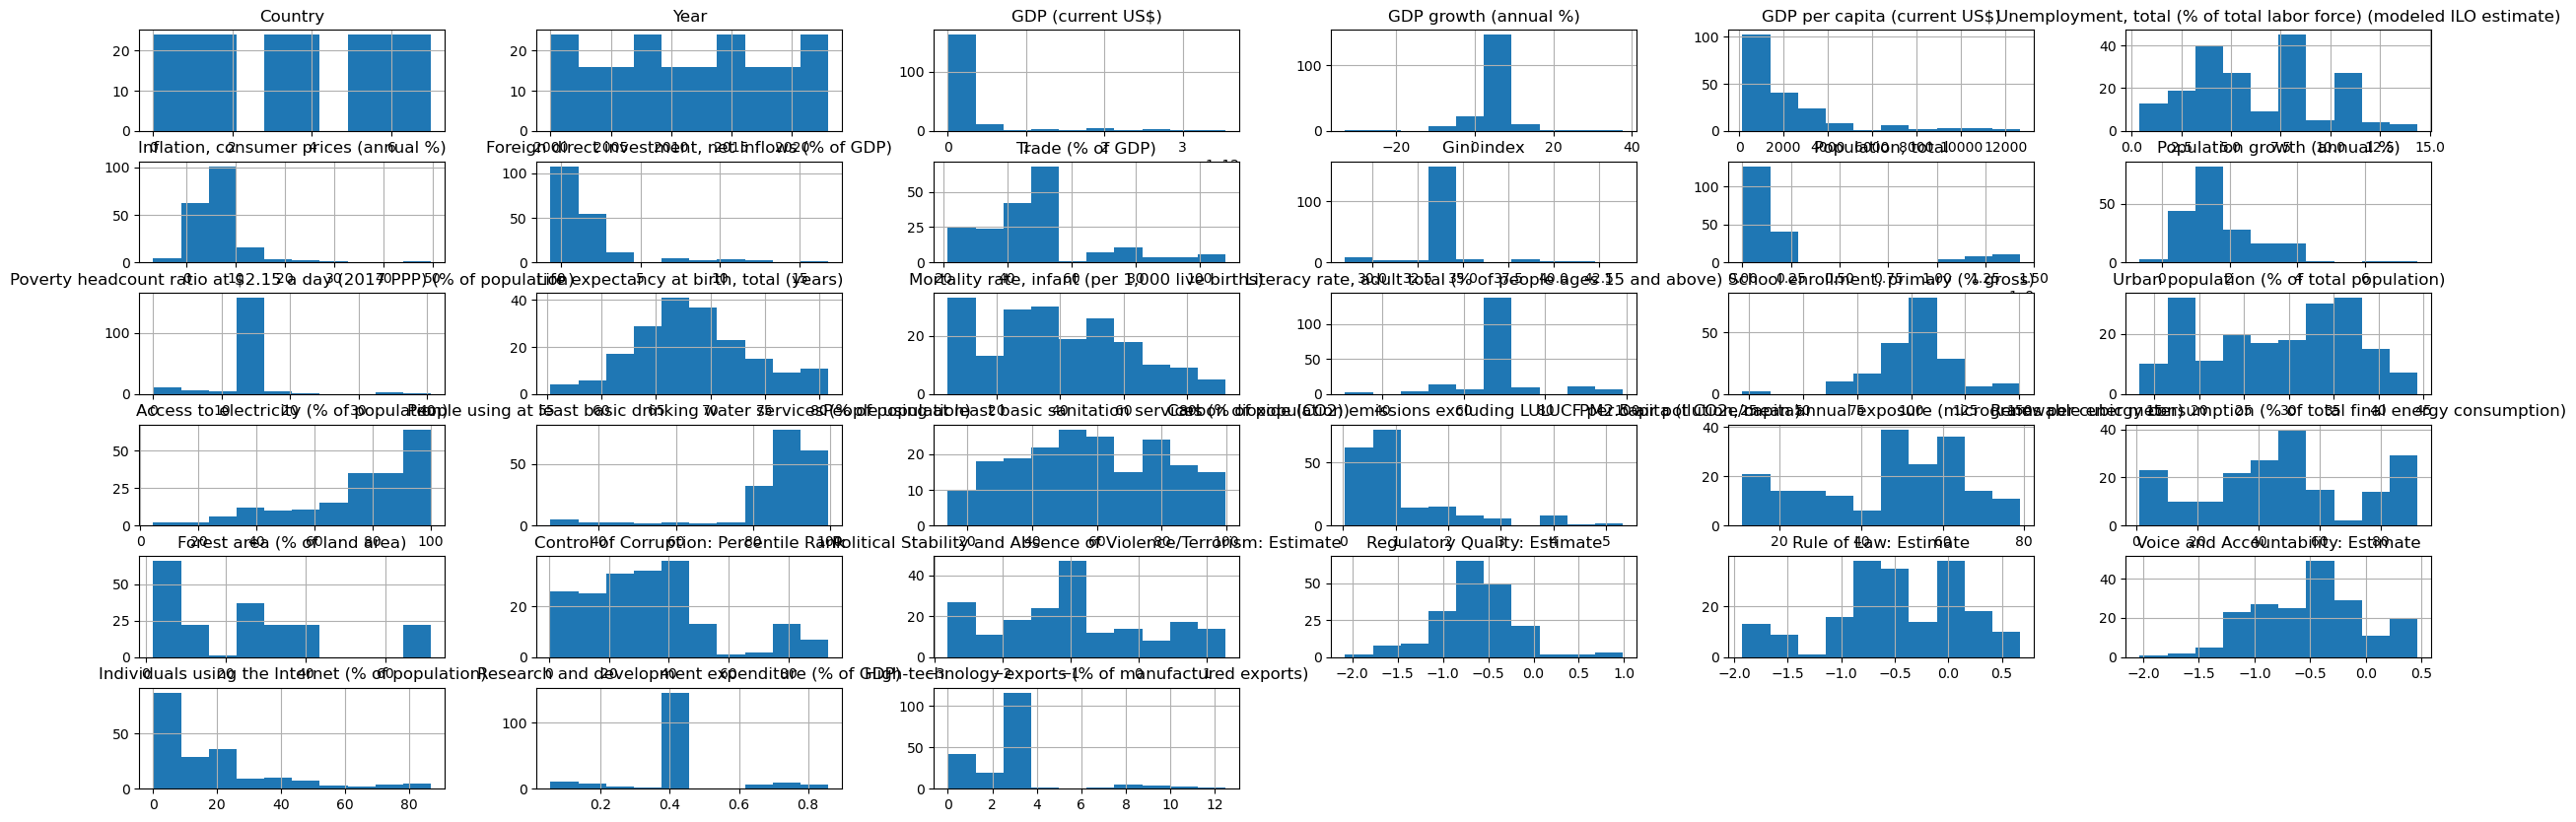

In [31]:
## Histogram Distribution of Numerical Variables in Dataset
data.hist(bins=10, figsize=(30,10))
plt.show()

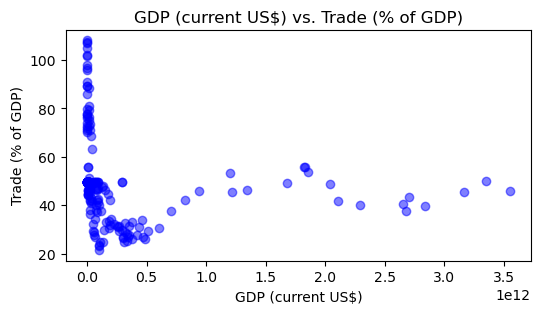

In [32]:
# Create a scatter plot to visualize the relationship between GDP and Trade (% of GDP)
plt.figure(figsize=(6, 3))
plt.scatter(data['GDP (current US$)'], data['Trade (% of GDP)'], color='blue', alpha=0.5)

# Add titles and labels
plt.title('GDP (current US$) vs. Trade (% of GDP)')
plt.xlabel('GDP (current US$)')
plt.ylabel('Trade (% of GDP)')

# Display the plot
plt.show()

C:\Users\MHMD RAGAB\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


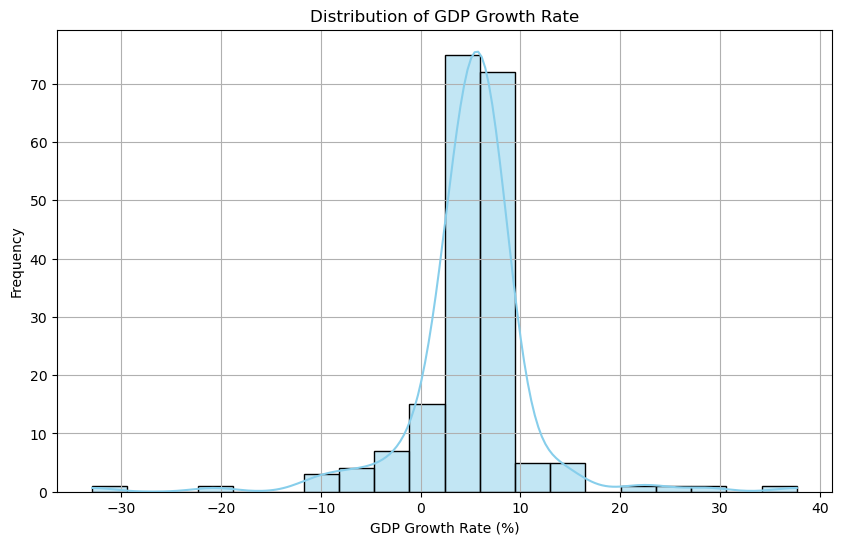

In [59]:
# Plot the distribution of GDP growth rate for all countries
plt.figure(figsize=(10, 6))
sns.histplot(data['GDP growth (annual %)'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of GDP Growth Rate')
plt.xlabel('GDP Growth Rate (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

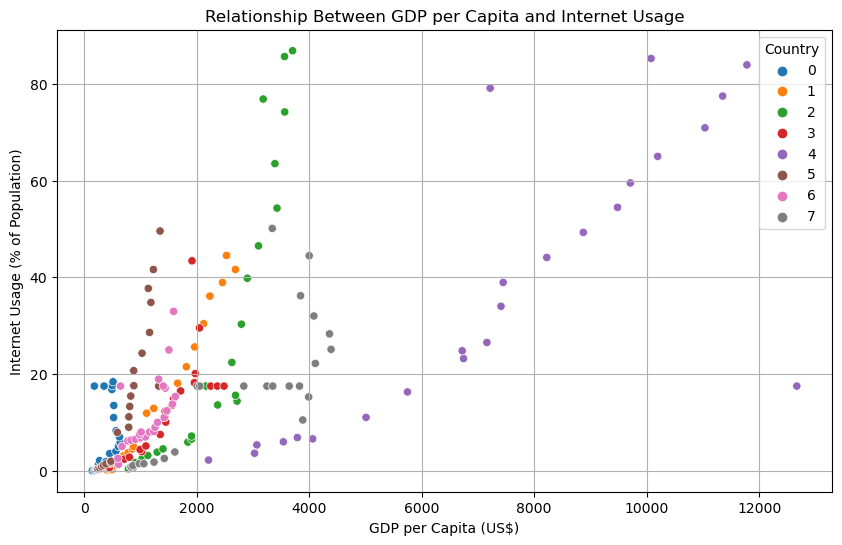

In [64]:
#  Scatter plot comparing GDP per capita and internet usage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP per capita (current US$)', y='Individuals using the Internet (% of population)', hue='Country', data=data, palette='tab10')
plt.title('Relationship Between GDP per Capita and Internet Usage')
plt.xlabel('GDP per Capita (US$)')
plt.ylabel('Internet Usage (% of Population)')
plt.grid(True)
plt.show()

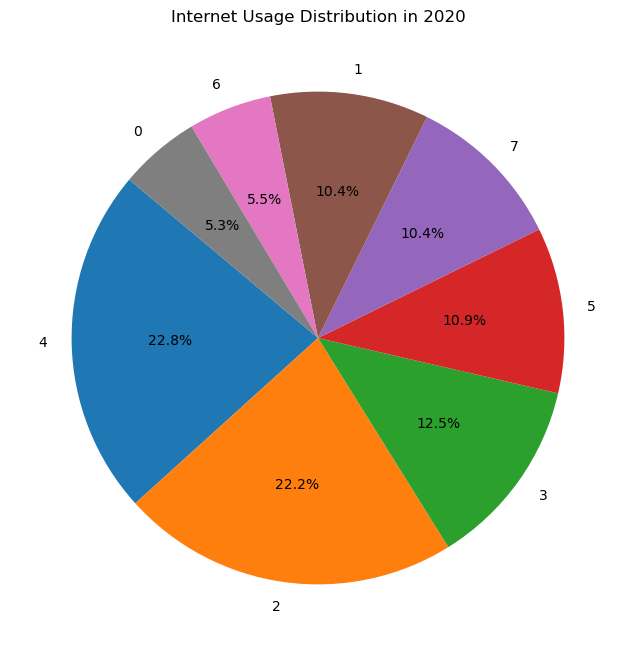

In [76]:
# Pie chart of internet usage for a specific year
year = 2020
internet_data = data[data['Year'] == year][['Country', 'Individuals using the Internet (% of population)']].dropna()
internet_data = internet_data.sort_values(by='Individuals using the Internet (% of population)', ascending=False)
plt.figure(figsize=(10, 8))
plt.pie(internet_data['Individuals using the Internet (% of population)'], labels=internet_data['Country'], autopct='%1.1f%%', startangle=140)
plt.title(f'Internet Usage Distribution in {year}')
plt.show()

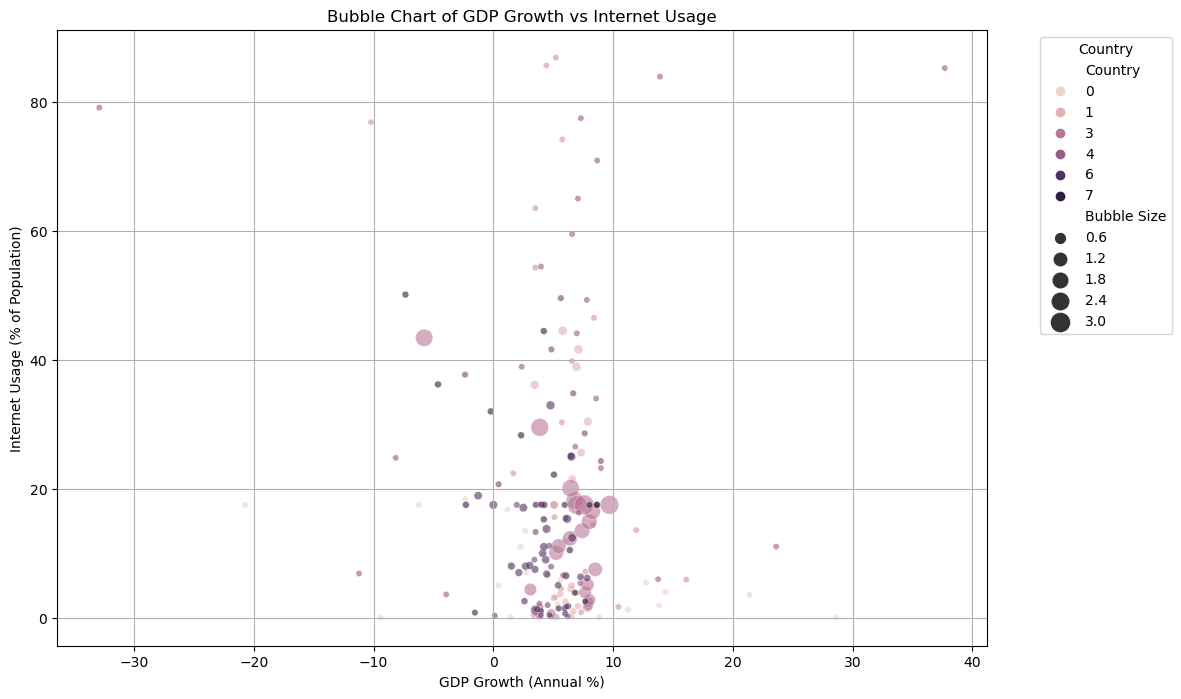

In [77]:
#  Bubble chart for GDP, Internet Usage, and Population
data['Bubble Size'] = data['GDP (current US$)'] / 1e12  # Normalize bubble size for visualization
plt.figure(figsize=(12, 8))
bubble_chart_data = data.dropna(subset=['GDP (current US$)', 'Individuals using the Internet (% of population)', 'GDP growth (annual %)'])
sns.scatterplot(
    x='GDP growth (annual %)',
    y='Individuals using the Internet (% of population)',
    size='Bubble Size',
    hue='Country',
    data=bubble_chart_data,
    sizes=(20, 200),
    alpha=0.6
)
plt.title('Bubble Chart of GDP Growth vs Internet Usage')
plt.xlabel('GDP Growth (Annual %)')
plt.ylabel('Internet Usage (% of Population)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Country')
plt.grid(True)
plt.show()


### feature extraction and selection

In [37]:
# Correlation with GDP and sorting
data.corr()['GDP (current US$)'].sort_values(ascending=False)


GDP (current US$)                                                             1.000000
Population, total                                                             0.904192
High-technology exports (% of manufactured exports)                           0.811099
Voice and Accountability: Estimate                                            0.479036
Research and development expenditure (% of GDP)                               0.469052
PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)        0.281308
Year                                                                          0.233076
Urban population (% of total population)                                      0.225977
Regulatory Quality: Estimate                                                  0.217151
Rule of Law: Estimate                                                         0.204445
Access to electricity (% of population)                                       0.170036
Poverty headcount ratio at $2.15 a day (201

### model training

In [39]:
# Separate features (X) and target variable (y)
X = data.drop('GDP (current US$)', axis=1)
y = data['GDP (current US$)']


In [40]:
# Split the data into training and testing sets ,train a linear regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len_reg = LinearRegression()
len_reg.fit(X_train, y_train)


LinearRegression()

In [41]:
# Predict target values for the test set
y_pred = len_reg.predict(X_test)


In [42]:
# Evaluate the model's performance using Mean Squared Error and R² Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 2.406597662306347e+22
R² Score: 0.8835720950151121


In [43]:
# Train a Random Forest Regressor on the training data
rand_fors_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rand_fors_reg.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [44]:
# Predict target values for the test set using the Random Forest Regressor
y_pred_forest = rand_fors_reg.predict(X_test)


In [45]:
# Calculate the Mean Squared Error and R² Score for the Random Forest model
mse = mean_squared_error(y_test, y_pred_forest)
r2 = r2_score(y_test, y_pred_forest)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 1.639086978675073e+21
R² Score: 0.9920703212670678


In [46]:
# Train a K-Nearest Neighbors Regressor on the training data
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)


KNeighborsRegressor()

In [47]:
# Predict target values for the test set using the K-Nearest Neighbors model
y_pred_knn = knn_model.predict(X_test)


In [48]:
# Calculate the Mean Squared Error and R² Score for the KNN model
mse = mean_squared_error(y_test, y_pred_knn)
r2 = r2_score(y_test, y_pred_knn)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Squared Error (MSE): 2.909082623875668e+21
R² Score: 0.9859262559491895


In [49]:
# Train an XGBoost Regressor model on the training data
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=50, learning_rate=0.01, max_depth=10)
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [50]:
# Predict target values for the test set using the XGBoost model
y_pred_xgboost = xgb_model.predict(X_test)


In [51]:
# Calculate the Mean Squared Error and R² Score for the XGBoost model
mse = mean_squared_error(y_test, y_pred_xgboost)
r2 = r2_score(y_test, y_pred_xgboost)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)



Mean Squared Error (MSE): 8.674279342694351e+22
R² Score: 0.5803502234952993


In [52]:
# Calculate the Root Mean Squared Error (RMSE) from MSE
mse = mean_squared_error(y_test, y_pred_xgboost)

# RMSE
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 294521295370.88403


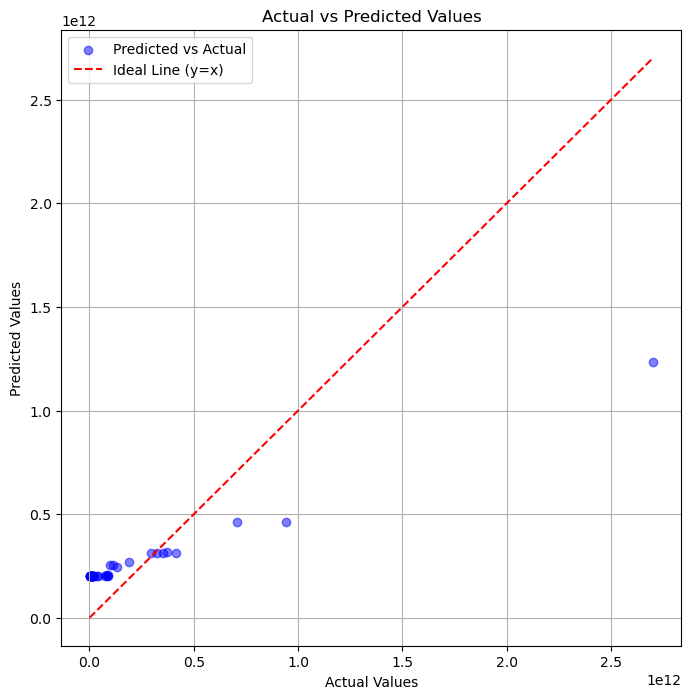

In [54]:
# Plot Actual vs Predicted values for the XGBoost model
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_xgboost, color="blue", alpha=0.5, label="Predicted vs Actual")

# Ideal line (y=x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Ideal Line (y=x)")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.grid(True)

plt.show()


In [55]:
# Calculate and store MSE for both training and testing sets
train_scores = []
test_scores = []

# Predict and calculate MSE for training set
y_train_pred = xgb_model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_scores.append(train_mse)

# Predict and calculate MSE for testing set
y_test_pred = xgb_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_scores.append(test_mse)


In [56]:
print(train_scores)
print(test_scores)

[2.1063607225161875e+23]
[8.674279342694351e+22]
